In [48]:
pip install py_vollib

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 5.2 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62830 sha256=9edfac65334ef591bd2377c7bda18a3bfe78871ce2478cca8efd5b55c8b8b1c8
  Stored in directory: /Users/harisman/Library/Caches/pip/wheels/5f/8c/ab/bbc3a2b0e6ae83633bb99f960459a2ab960b4672c7440ff4ef
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24452 sha256=4358691ca50f97203623c9d1f31f09649385e14de0a66512126b0126b15629f1
  Stored in directory: /Users/harisman/Library/Caches/pip/wheels/c3/c6/50/415aabc2033e7651cc8cc590bd01c5f23f9050328f6016d6a5
Successfully built py_vollib py_lets_be_rational
Note: you may need to restart the kernel to use updated packages.


In [62]:
from rbergomi import rBergomi
from data import param_generator
from data import rBergomi_pricer

def generate_rBergomi_surface(param_generator, S0=1.0):
    params = param_generator()
    H, eta, rho, v0 = params['H'], params['eta'], params['rho'], params['v0']

    moneyness_grid = np.linspace(0.8, 1.2, 8)
    maturity_grid = np.linspace(0.1, 2.0, 11)
    iv_grid = np.zeros((len(moneyness_grid), len(maturity_grid)))

    for i, moneyness in enumerate(moneyness_grid):
        K = moneyness * S0
        for j, T in enumerate(maturity_grid):
            _, iv = rBergomi_pricer(H, eta, rho, v0, T, K, S0)
            iv_grid[i, j] = iv

    sample = {
        'H': H,
        'eta': eta,
        'rho': rho,
        'v0': v0,
        'iv_grid': iv_grid
    }
    return sample

H: 0.08886364237590232
eta: 2.7730637108739487
rho: -0.9937789045174178
v0: 0.23836040116384888
IV grid shape: (8, 11)


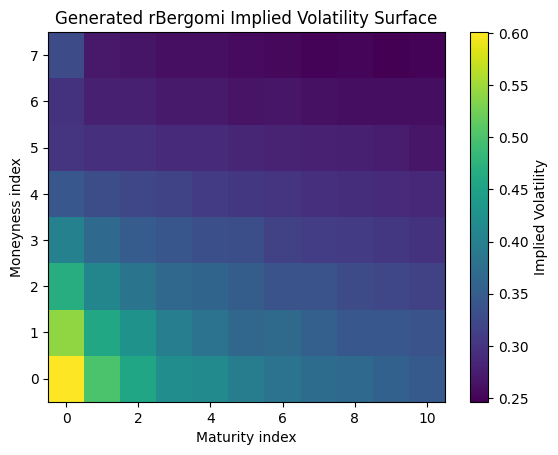

In [64]:
sample = generate_rBergomi_surface(param_generator)

# See the random parameters
print(f"H: {sample['H']}")
print(f"eta: {sample['eta']}")
print(f"rho: {sample['rho']}")
print(f"v0: {sample['v0']}")

# See the shape of the IV grid
print("IV grid shape:", sample['iv_grid'].shape)

# Display the full IV grid
import matplotlib.pyplot as plt
plt.imshow(sample['iv_grid'], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Implied Volatility')
plt.xlabel('Maturity index')
plt.ylabel('Moneyness index')
plt.title('Generated rBergomi Implied Volatility Surface')
plt.show()